In [11]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
X = preprocessing.scale(X)


# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((4, 3), dtype=tf.float64))
b = tf.Variable([0.01, 0.01, 0.01], dtype=tf.float64)

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

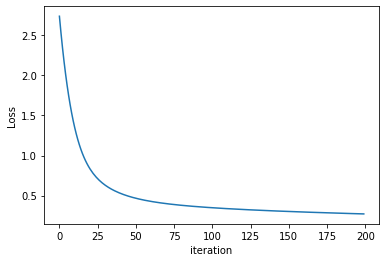

In [12]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [13]:
preds = predict(X, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

(150,)
(150, 1)
0.9
